In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("data (1).csv")




# Inspect first few rows and column names
print(df.head())
print(df.columns) 



# Clean column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())  # print cleaned column names

# Split features and target
X = df.drop('pump', axis=1)
y = df['pump']

# Make a copy of features to encode
X_cleaned = X.copy()

# Encode all object-type columns in X
for col in X_cleaned.columns:
    if X_cleaned[col].dtype == 'object':
        X_cleaned[col] = LabelEncoder().fit_transform(X_cleaned[col])

# If y is a string label, encode it too
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)   



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)   


# Check that all features are now numeric
print(X_cleaned.dtypes)


     crop  moisture  temp  pump
0  cotton       638    16     1
1  cotton       522    18     1
2  cotton       741    22     1
3  cotton       798    32     1
4  cotton       690    28     1
Index(['crop', 'moisture', 'temp', 'pump'], dtype='object')
['crop', 'moisture', 'temp', 'pump']
crop        int64
moisture    int64
temp        int64
dtype: object


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        31

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[ 9  0]
 [ 0 31]]


In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        31

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



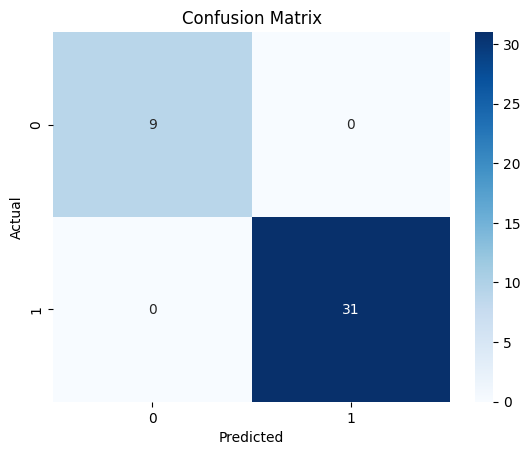

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt

import seaborn as sns



print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        31

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



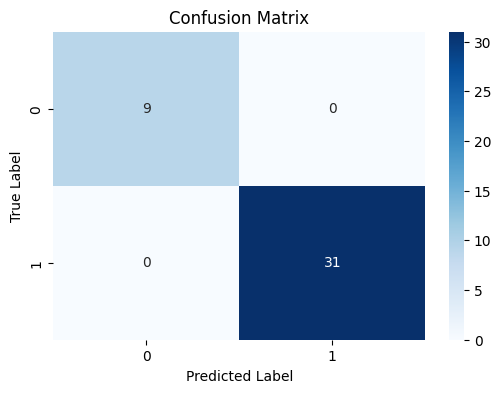

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [22]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.5 MB/s  0:00:00m 2.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [fastapi]━━━ 6/8 [pydantic]


In [5]:
# app.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Load trained model
model = joblib.load("irrigation_model.pkl")

# Define expected JSON schema
class SensorData(BaseModel):
    temperature: float
    humidity: float
    soil_moisture: float
    crop_type: int  # If you excluded this, remove it

app = FastAPI()

@app.post("/predict")
def predict(data: SensorData):
    # Convert JSON to model input
    input_array = np.array([[data.temperature, data.humidity, data.soil_moisture, data.crop_type]])
    prediction = model.predict(input_array)
    return {"pump": int(prediction[0])}


In [24]:
pip install scikit-learn==1.7.1


  Using cached scikit_learn-1.7.1-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!uvicorn app:app --reload

INFO:     Will watch for changes in these directories: ['/home/stez/Desktop/Machine Learning ']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [588477] using StatReload
ERROR:    Error loading ASGI app. Could not import module "app".
INFO:     Started server process [590189]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [590189]
INFO:     Started server process [590215]
INFO:     Waiting for application startup.
INFO:     Application startup complete.


In [ ]:
uvicorn app:app --reload

In [ ]:
uvicorn app:app --reload &